In [1]:
import numpy as np
from math import e
from PIL import Image
import glob
import cv2
from matplotlib import pyplot as plt
import matplotlib
from math import exp
from math import sqrt

In [2]:
def distance(point1,point2):
    return sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def gaussianHP(D0,image,u,v):
    base = np.ones(image.shape[0:2])
    rows, cols = image.shape[0:2]
    for y in range(cols):
        for x in range(rows):
            base[x,y] = 1-exp(((-distance((x,y),(u,v))**2)/(2*(D0**2))))
    return base

In [3]:
def gaussianLP(D0,image,u,v):
    base = np.ones(image.shape[0:2])
    rows, cols = image.shape[0:2]
    for y in range(cols):
        for x in range(rows):
            base[x,y] = exp(((-distance((x,y),(u,v))**2)/(2*(D0**2))))
    return base

In [4]:
def dft(image):
    dft = np.array(np.fft.fftshift(np.fft.fft2(image)))
    return dft

In [5]:
def show_dft(dft,image_name):
    #plt.rcParams['figure.figsize'] = [10,3]
    #plt.subplot(1,3,i+1)
    plt.imshow(np.log(np.abs(dft)),'gray')
    plt.suptitle('dft of image #{}'.format(image_name))
    plt.axis('off')
    plt.show()

In [6]:
def inv_fil_dfts(dfts):
    inv_dfts = []
    for i in range(len(dfts)):
        inv_dfts.append(np.real(np.fft.ifft2(np.fft.ifftshift(dfts[i]))))
    return np.array(inv_dfts)

In [7]:
def inv_dft(dft):
    return(np.real(np.fft.ifft2(np.fft.ifftshift(dft))))

In [8]:
def show_images(inv_dfts):
    plt.rcParams['figure.figsize'] = [10,10]
    for i in range(len(inv_dfts)):
        plt.subplot(1,4,i+1)
        plt.imshow(inv_dfts[i],'gray')
#         plt.suptitle('dfts of image #{}'.for)
        plt.axis('off')
    plt.show()

In [9]:
images = np.array([cv2.imread(file) for file in glob.glob("C:/Users/sherw/OneDrive/Desktop/DIP_HW3/inputs/p6/*.jpg")])

In [10]:
images = [cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in images]

In [11]:
import numpy as np
import matplotlib.pyplot as plt


def norm_image(imageArray):
    return (imageArray.astype(np.float64) / 255.0)

def translate_image(img, t, axis):
    pad_width = [(0,0), (0,0)]
    if t > 0:
        pad_width[axis] = (t, 0)
    else:
        pad_width[axis] = (0, -t)
    pad_width = tuple(pad_width)
    return np.pad(img, pad_width, mode='constant')

def align_imgs(img1, img2):
    h1, w1 = img1.shape
    h2, w2 = img2.shape

    plt.imshow(img1, cmap='gray')
    x1, y1 = tuple(zip(*plt.ginput(2)))
    cx1, cy1 = np.mean(x1), np.mean(y1)
    plt.imshow(img2, cmap='gray')
    x2, y2 = tuple(zip(*plt.ginput(2)))
    cx2, cy2 = np.mean(x2), np.mean(y2)

    tx = int(np.round((w1 / 2 - cx1) * 2))
    img1 = translate_image(img1, tx, axis=1)
    ty = int(np.round((h1 / 2 - cy1) * 2))
    img1 = translate_image(img1, ty, axis=0)
    tx = int(np.round((w2 / 2 - cx2) * 2))
    img2 = translate_image(img2, tx, axis=1)
    ty = int(np.round((h2 / 2 - cy2) * 2))
    img2 = translate_image(img2, ty, axis=0)

    len1 = np.sqrt((y1[1]-y1[0]) ** 2 + (x1[1]-x1[0]) ** 2)
    len2 = np.sqrt((y2[1]-y2[0]) ** 2 + (x2[1]-x2[0]) ** 2)

    dscale = len2 / len1

    if dscale < 1:
        new_size = (dscale*np.array(img1.shape)).astype('int')
        ####
        img1 = np.array(Image.fromarray(img1).resize(new_size, resample=Image.BILINEAR))
        ####

    else:
        new_size = ((1/dscale)*np.array(img2.shape)).astype('int')
        ####
        img2 = np.array(Image.fromarray(img2).resize(new_size, resample=Image.BILINEAR) )
        ####


    theta1 = np.arctan2(-(y1[1]-y1[0]), x1[1]-x1[0])
    theta2 = np.arctan2(-(y2[1]-y2[0]), x2[1]-x2[0])
    dtheta = theta2-theta1
    img1 = Image.fromarray(img1).rotate(dtheta*180/np.pi, resample=Image.BILINEAR)
    img1 = np.array(img1)
    img1 = norm_image(img1)

    h1, w1 = img1.shape
    h2, w2 = img2.shape

    minw = min(w1, w2)
    brd = (max(w1, w2) - minw) / 2

    if minw == w1:
        img2 = img2[:, int(np.ceil(brd)):-int(np.floor(brd))]
    else:
        img1 = img1[:, int(np.ceil(brd)):-int(np.floor(brd))]

    minh = min(h1, h2)
    brd = (max(h1, h2) - minh) / 2

    if minh == h1:
        img2 = img2[int(np.ceil(brd)):-int(np.floor(brd)), :]
    else:
        img1 = img1[int(np.ceil(brd)):-int(np.floor(brd)), :]

    return img1, img2


In [32]:
def norm_img(image):
    return((image - np.min(image))/(np.max(image)-np.min(image)))*255

In [13]:
# %matplotlib inline

In [22]:
# %matplotlib qt

In [53]:
a,b = align_imgs(images[1],images[2])
c,d = align_imgs(images[0],images[3])
new_images = [a,b,d,c]

In [160]:
# %matplotlib inline

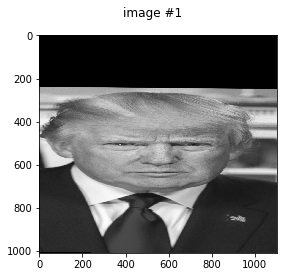

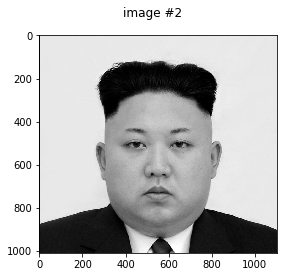

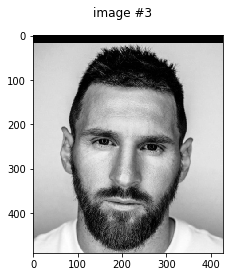

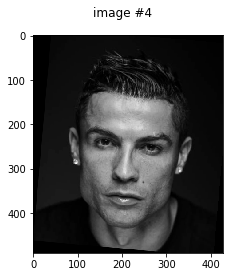

In [161]:
for i in range(len(new_images)):
    plt.figure()
    plt.suptitle('image #{}'.format(i+1))
    plt.imshow(new_images[i],'gray')

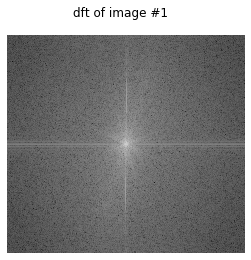

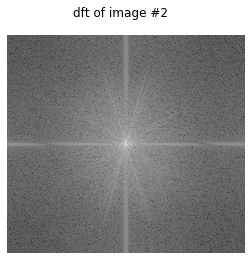

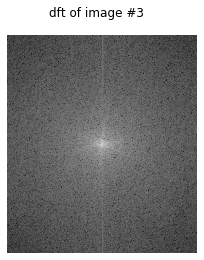

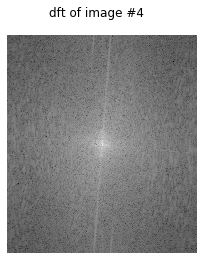

In [162]:
dfts = []
for i in range(len(new_images)):
    plt.figure()
    x = dft(new_images[i])
    dfts.append(dft(new_images[i]))
    show_dft(x,i+1)

In [205]:
bs, u, v, fil_images = [], [], [], []
D0 = [35,35,14,14]
for i in range(len(new_images)):
    x, y = new_images[i].shape
    u.append(x/2)
    v.append(y/2)
    if i%2 == 0:
        bs.append(gaussianLP(D0[i],new_images[i],u[i],v[i]))
        fil_images.append(inv_dft(bs[i]*dfts[i]))
    if i%2 == 1:
        bs.append(gaussianLP(D0[i],new_images[i],u[i],v[i]))
        fil_images.append(new_images[i] - inv_dft(bs[i]*dfts[i]))

In [206]:
for i in range(len(fil_images)):
    fil_images[i] = norm_img(fil_images[i])

[]

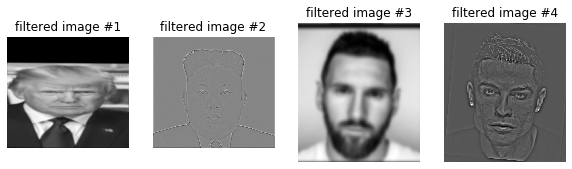

In [207]:
for i in range(len(fil_images)):
    plt.rcParams['figure.figsize'] = [10,3]
    plt.subplot(1,4,i+1)
    plt.imshow(fil_images[i],'gray')
    plt.title('filtered image #{}'.format(i+1))
    plt.axis('off')
plt.show()

[]

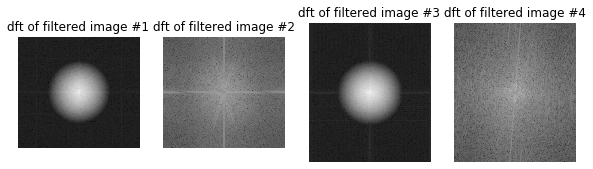

In [208]:
for i in range(len(fil_images)):
    d = dft(fil_images[i])
    plt.rcParams['figure.figsize'] = [10,3]
    plt.subplot(1,4,i+1)
    plt.imshow(np.log(np.abs(d)),'gray')
    plt.title('dft of filtered image #{}'.format(i+1))
    plt.axis('off')
plt.show()

(-0.5, 1102.5, 1009.5, -0.5)

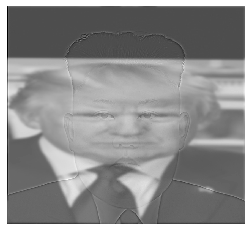

In [209]:
# %matplotlib inline
plt.figure()
plt.imshow(norm_img(fil_images[0])+norm_img(fil_images[1]),'gray')
plt.axis('off')

(-0.5, 427.5, 489.5, -0.5)

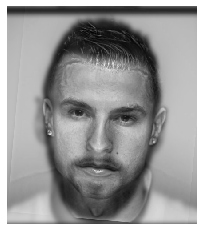

In [210]:
# %matplotlib inline
plt.figure()
plt.imshow(norm_img(fil_images[2])+norm_img(fil_images[3]),'gray')
plt.axis('off')

[]

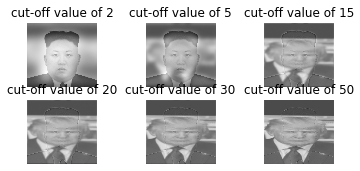

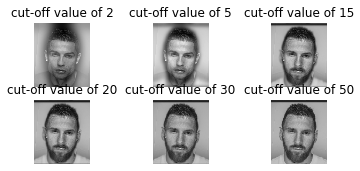

In [211]:
# D0 = []
# %matplotlib inline
values = [2,5,15,20,30,50]
fig1 = plt.figure(1)
fig2 = plt.figure(2)
for num in range(len(values)):
    D0 = values[num]*4
    fig1 = plt.figure(1)
    bs, u, v, fil_images = [], [], [], []
    for i in range(len(new_images)):
        x, y = new_images[i].shape
        u.append(x/2)
        v.append(y/2)
        if i%2 == 0:
            bs.append(gaussianLP(values[num],new_images[i],u[i],v[i]))
            fil_images.append(inv_dft(bs[i]*dfts[i]))
        if i%2 == 1:
            bs.append(gaussianLP(values[num],new_images[i],u[i],v[i]))
            fil_images.append(new_images[i] - inv_dft(bs[i]*dfts[i]))
        fil_images[i] = norm_img(fil_images[i])
    plt.figure(1)
    plt.rcParams['figure.figsize'] = [10,3]
    plt.subplot(3,3,num+1)
    plt.imshow(norm_img(fil_images[0])+norm_img(fil_images[1]),'gray')
    plt.title('cut-off value of {}'.format(values[num]))
    plt.axis('off')
    
    plt.figure(2)
    plt.rcParams['figure.figsize'] = [10,3]
    plt.subplot(3,3,num+1)
    plt.imshow(norm_img(fil_images[2])+norm_img(fil_images[3]),'gray')
    plt.title('cut-off value of {}'.format(values[num]))
    plt.axis('off')
plt.show()
